In [35]:
import os
import similaritymeasures
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [61]:
def get_scores(val_data_path, val_run_path, save_loc):
    os.makedirs(save_loc,exist_ok=True)
    frechet_dists = []
    euclidean_dists = []
    for episode in range(25):
        episode = str(episode)
        filename = os.path.join(val_run_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        run_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_data_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        data_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_run_path,episode,'command.txt')
        with open(filename,'r') as f:
            command = f.readline().strip()

        plt.plot(data_traj[:,0],data_traj[:,1],label='Ground Truth')
        plt.plot(run_traj[:,0],run_traj[:,1],label='Inference on Prediction')
        plt.scatter(data_traj[-1,0],data_traj[-1,1],s=100,label='Ground Truth - End Point')
        plt.scatter(run_traj[-1,0],run_traj[-1,1],s=100,label='Inference - End Point')
        plt.scatter(data_traj[0,0],data_traj[0,1],s=100,label='Starting Point')

        x_min = np.min(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_min = np.min(np.hstack([data_traj[:,1],run_traj[:,1]]))

        x_max = np.max(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_max = np.max(np.hstack([data_traj[:,1],run_traj[:,1]]))

        frechet_dists.append(similaritymeasures.frechet_dist(run_traj,data_traj))

        euclidean_dists.append(similaritymeasures.distance.euclidean(data_traj[-1,:],run_traj[-1,:]))

        plt.xlim(x_min-5, x_max+5)
        plt.ylim(y_min-5, y_max+5)
        plt.gca().invert_xaxis()
        plt.axis('off')
        plt.title(command)

        plt.legend()
        print(f'Episode {episode}: {command}')
        print(f'Frechet Distance: {frechet_dists[-1]}')
        print(f'Euclidean Distance between End Points: {euclidean_dists[-1]}')
    #     print(f'Curve Length Measure: {cl_measures[-1]}')
        plt.savefig(os.path.join(save_loc,episode)+'.png')    
#         plt.show()
    return frechet_dists, euclidean_dists

In [ ]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_runs/'
save_loc = '../trajectories/'

f,e = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: park near the bus stand
Frechet Distance: 8.067973423453093
Euclidean Distance between End Points: 8.067973423453093
Episode 1: stop near the tallest building
Frechet Distance: 53.00581683992712
Euclidean Distance between End Points: 53.005816839927114
Episode 2: Take a right from the intersection
Frechet Distance: 17.871254623761335
Euclidean Distance between End Points: 17.871254623761335
Episode 3: go right from the corner
Frechet Distance: 5.424230403686319
Euclidean Distance between End Points: 5.424230403686319
Episode 4: Drive towards the bus stop
Frechet Distance: 5.883544924222516
Euclidean Distance between End Points: 5.883544924222516
Episode 5: take a left from the intersection
Frechet Distance: 4.207446052814155
Euclidean Distance between End Points: 4.207446052814155


In [ ]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_run_baseline/'
save_loc = '../trajectories_baseline/'

f_bl,e_bl = get_scores(val_data_path, val_run_path, save_loc)

In [40]:
import seaborn as sns

In [41]:
import pandas as pd

In [53]:
f_df = pd.DataFrame({'Cross Attention':f,'Concatenation':f_bl})
e_df = pd.DataFrame({'Cross Attention':e,'Concatenation':e_bl})

Text(0.5, 1.0, 'Freschet Distance')

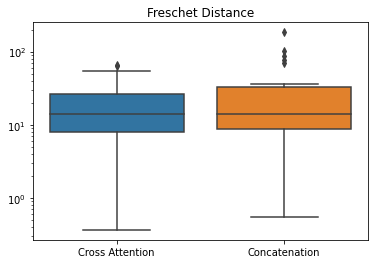

In [58]:
g = sns.boxplot(data=f_df)
g.set_yscale("log")
plt.title('Freschet Distance')

Text(0.5, 1.0, 'Euclidean Distance Between End Points')

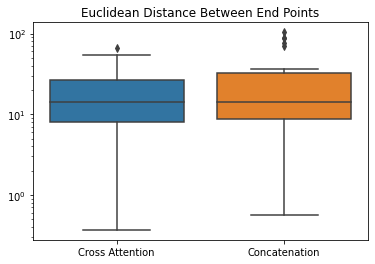

In [57]:
g = sns.boxplot(data=e_df)
g.set_yscale("log")
plt.title('Euclidean Distance Between End Points')